# Group 49 CNN model


## Data Loading & Imports

This sections contains all the intial imports and sets up the ability to imnport the dataset classes from the data processing file.

In [ ]:
# MOUNT DRIVE A THE FOLDER DIRECTORY
from google.colab import drive
drive.mount('/content/drive/')




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Project /Model"
%pwd

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-e9cfee229d01>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', '"/content/drive/MyDrive/Project /Model"')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPyt

In [ ]:
from utils import ImageDataset

import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from skimage.io import imread
import skimage.io
from tqdm import tqdm
import os

# Initializing Datasets
This section initialize the train, validation, and test datasets

In [ ]:
t = transforms.Compose([transforms.ToTensor(), transforms.Resize((450, 450))])

train_dataset = ImageDataset(
   name='Train',
   csv_file='training_data_onehot.csv',
   root_dir='Ham10000',
   transforms= t
)

validation_dataset = ImageDataset(
   name='Validation',
   csv_file='validation_data_onehot.csv',
   root_dir='Ham10000',
   transforms= t
)

test_dataset = ImageDataset(
   name='Test',
   csv_file='test_data_onehot.csv',
   root_dir='HIBA Images - Test',
   transforms= t
)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-766167ea59ac>", line 3, in <cell line: 3>
    train_dataset = ImageDataset(
  File "/content/drive/.shortcut-targets-by-id/1iAsHu75MZqQi03g8IZnF4UG6jJs-pJjE/Project /Model/utils.py", line 12, in __init__
    self.annotations = pd.read_csv(csv_file)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReade

In [ ]:
# TESTING TO MAKE SURE THAT THE DATASET AND LOADER WORK
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size = 16,
    shuffle = True,
)

dataset_loader = iter(test_loader) # make dataset batches iterable

# plot 4 batches
for j in range(4):
  images, diagnosis, ben_or_mal = next(dataset_loader) # obtain images and labels for one batch
  images = images.detach().cpu().numpy() # convert images to numpy array

  # Plot all images within the batch
  figure = plt.figure(figsize=(8, 2))
  for i in np.arange(16):
    subplot = figure.add_subplot(2, 8, i+1, xticks=[], yticks=[]) # creates subplot for each image
    plt.imshow(np.transpose(images[i], (1, 2, 0))) # plots each image
    subplot.set_title(test_dataset.get_categorical_value(diagnosis[i], 'diagnosis')) # sets plot title as image label

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-467d954a423f>", line 12, in <cell line: 11>
    images, diagnosis, ben_or_mal = next(dataset_loader) # obtain images and labels for one batch
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 633, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 677, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batch

# CNN Model Architecture


In [ ]:
#CNN with skip connections
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        self.conv1 = nn.Conv2d(3, 25, 3) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(4, 4) #kernel_size, stride
        self.conv2 = nn.Conv2d(25, 40, 3)
        self.pool2 = nn.MaxPool2d(4, 4)
        self.conv3 = nn.Conv2d(40, 14, 3)
        self.pool3 = nn.MaxPool2d(4, 4)

        self.classifier = nn.Sequential(
            #nn.Dropout(dropout),
            nn.Linear(14*6*6, 70),
            nn.ReLU(),
            nn.Linear(70, 7)
        )

    def forward(self, x):
        x1 = self.pool(F.relu(self.conv1(x)))
        x2 = self.pool2(F.relu(self.conv2(x1)))
        x3 = self.pool3(F.relu (self.conv3(x2)))
        x = x3.view(x.size(0), -1)
        x = x.view(-1, 14*6*6)
        #x = F.relu(self.fc1(x))
        #x = self.fc2(x)
        x = self.classifier(x)
        return x






# Functions

In [ ]:
def get_accuracy(network, loader):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """

    # for loss calc
    total_loss = 0.0

    # for accuracy calc
    correct_predictions = 0

    # total images viewed
    num_images = 0

    for i, data in enumerate(loader, 0):
        images, diagnosis, ben_or_mal = data

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          images = images.cuda()
          diagnosis = diagnosis.cuda()
          ben_or_mal = ben_or_mal.cuda()
        #############################################

        num_images += len(images)

        # get output from model
        outputs = network(images)

        # accuracy
        prediction = outputs.max(1, keepdim=True)[1]
        correct_predictions += prediction.eq(diagnosis.max(1, keepdim=True)[1].view_as(prediction)).sum().item()
    acc = correct_predictions/num_images # calculate overall accuracy
    return acc

def training_curve(epochs, train_acc, train_losses, val_acc, val_losses):
    plt.title("Train vs Validation Accuracy")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

    plt.title("Train vs Validation Loss")
    plt.plot(epochs, train_losses, label="Train")
    plt.plot(epochs, val_losses, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()




def train(model, train_set, val_set, num_epochs=0, learning_rate=0, batch_size=0, weight_decay=0, plot=True):
    # Get loaders with the appropriate batch size
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

    # Accumulators
    epochs = []

    # Training Accumulators
    train_losses = []
    train_accs = []

    # Validation Accumulators
    val_losses = []
    val_accs = []

    torch.manual_seed(42)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), weight_decay=weight_decay, lr=learning_rate)

    #for early stopping
    try:
      start_time = time.time()
      #print('Training Start')
      for epoch in range(num_epochs):
          # for progress tracking
          train_batch_num = 0
          val_batch_num = 0

          # for accuracy calc
          train_correct_predictions = 0
          val_correct_predictions = 0
          train_num_images = 0
          val_num_images = 0

          for data in train_loader:
              train_batch_num += 1
              #print(f'\nTrain Batch: {train_batch_num}')

              images, diagnosis, ben_or_mal = data

              #############################################
              #To Enable GPU Usage
              if use_cuda and torch.cuda.is_available():
                images = images.cuda()
                diagnosis = diagnosis.cuda()
                ben_or_mal = ben_or_mal.cuda()
              #############################################


              train_num_images += len(images)

              #print(f'{train_batch_num}: Starting Model Training Output')
              outputs = model(images)
              #print(f'{train_batch_num}: Model Training Output Complete!')

              #print(f'\n{train_batch_num}: Starting Training Accuracy')
              prediction = outputs.max(1, keepdim=True)[1]
              train_correct_predictions += prediction.eq(diagnosis.max(1, keepdim=True)[1].view_as(prediction)).sum().item()
              train_acc = train_correct_predictions/train_num_images # calculate overall accuracy
              #print(f'{train_batch_num}: Training Accuracy: {train_acc}')

              #print(f'\n{train_batch_num}: Starting Training Loss')
              train_loss = criterion(outputs, diagnosis)
              train_loss.backward()

              optimizer.step()
              optimizer.zero_grad()
              #print(f'{train_batch_num}: Training Loss: {train_loss}!')

          for data in val_loader:
              val_batch_num += 1
              #print(f'\nValidation Batch: {val_batch_num}')

              images, diagnosis, ben_or_mal = data

              #############################################
              #To Enable GPU Usage
              if use_cuda and torch.cuda.is_available():
                images = images.cuda()
                diagnosis = diagnosis.cuda()
                ben_or_mal = ben_or_mal.cuda()
              #############################################

              val_num_images += len(images)

              #print(f'{train_batch_num}: Starting Model Validation Output')
              outputs = model(images)
              #print(f'{train_batch_num}: Model Validation Output Complete!')

              #print(f'\n{train_batch_num}: Starting Validation Accuracy')
              prediction = outputs.max(1, keepdim=True)[1]
              val_correct_predictions += prediction.eq(diagnosis.max(1, keepdim=True)[1].view_as(prediction)).sum().item()
              val_acc = val_correct_predictions/val_num_images # calculate overall accuracy
              #print(f'{train_batch_num}: Validation Accuracy: {val_acc}!')

              #print(f'\n{train_batch_num}: Starting Validation Loss')
              val_loss = criterion(outputs, diagnosis)
              #print(f'{train_batch_num}: Validation Loss: {val_loss}!')


          # Data Accumulation & Reporting
          print('\nAdding Values to lists')
          epochs.append(epoch)

          train_losses.append(float(train_loss)/batch_size)
          train_accs.append(train_acc)

          val_losses.append(float(val_loss)/batch_size)
          val_accs.append(val_acc)


          print((f"\nEpoch {epoch + 1}: Train Accuracy: {round(train_accs[epoch]*100, 6)}% | Validation Accuracy: {round(val_accs[epoch]*100, 6)}%"))


          # Saving current model
          #model_path =  f'Saved Models/CNN Models/model_{model.name}_bs{batch_size}_lr{learning_rate}_epoch{epoch + 1}'

          #torch.save(model.state_dict(), model_path)

    except KeyboardInterrupt:
      model_path =  f'Saved Models/CNN Models/model(*){model.name}_bs{batch_size}_lr{learning_rate}_epoch{epochs[-1] + 1}'
      torch.save(model.state_dict(), model_path)

      end_time = time.time()

      display.clear_output(wait=True)

      epochs_completed = epochs[-1] + 1

      if plot:
        training_curve(epochs, train_accs, train_losses, val_accs, val_losses)
      print(f'\nNumber of Epochs: {epochs_completed}')
      #print(f'Training Time Ellapsed: {round((end_time - start_time)/60, 2)} minutes')
      print(f"Training Accuracy Results: {train_accs[-1]*100}")
      print(f"Validation Accuracy Results: {val_accs[-1]*100}")

      dataframe = pd.DataFrame()
      dataframe.insert(loc=0, column='epochs', value=epochs)
      dataframe.insert(loc=1, column='train_loss', value=train_losses)
      dataframe.insert(loc=2, column='val_loss', value=val_losses)
      dataframe.insert(loc=3, column='tran_acc', value=train_accs)
      dataframe.insert(loc=4, column='val_acc', value=val_accs)

      return dataframe, epochs_completed


    end_time = time.time()
    epochs_completed = epochs[-1] + 1

    # Saving current model
    model_path =  f'Saved Models/CNN Models/model(*){model.name}_bs{batch_size}_lr{learning_rate}_epoch{epoch + 1}'
    torch.save(model.state_dict(), model_path)

    if plot:
      training_curve(epochs, train_accs, train_losses, val_accs, val_losses)

    print(f'\nTraining Time Ellapsed: {end_time - start_time}')
    print(f"Training Accuracy Results: {train_accs[-1]}")
    print(f"Validation Accuracy Results: {val_accs[-1]}")

    dataframe = pd.DataFrame()
    dataframe.insert(loc=0, column='epochs', value=epochs)
    dataframe.insert(loc=1, column='train_loss', value=train_losses)
    dataframe.insert(loc=2, column='val_loss', value=val_losses)
    dataframe.insert(loc=3, column='tran_acc', value=train_accs)
    dataframe.insert(loc=4, column='val_acc', value=val_accs)

    return dataframe, epochs_completed


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def test_model(model, test_dataset, batch_size):
    print('Fetching Loader')
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    # for accuracy calc
    correct_predictions = 0
    num_images = 0

    # for confustion matrix
    predictions = []
    labels = []

    batch_num = 0
    for i, data in enumerate(test_loader, 0):
        batch_num += 1
        print(f'Batch Number: {batch_num}')
        images, diagnosis, ben_or_mal = data

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          images = images.cuda()
          diagnosis = diagnosis.cuda()
          ben_or_mal = ben_or_mal.cuda()
        #############################################

        num_images += len(images)

        # get output from model
        outputs = model(images)


        # Model Prediction
        prediction = outputs.max(1, keepdim=True)[1]
        predictions.extend(prediction.cpu().numpy())

        # Ground Truth Label
        label = diagnosis.max(1, keepdim=True)[1]
        labels.extend(label.cpu().numpy())

        correct_predictions += prediction.eq(label.view_as(prediction)).sum().item()

    acc = correct_predictions/num_images # calculate overall accuracy
    print(f"\nOverall Accuracy: {acc*100}%")

    return acc, predictions, labels

def plot_cm(labels, predictions, test_dataset):
    cm = confusion_matrix(labels, predictions)
    cm_matrix = pd.DataFrame(data=cm,
        columns=[f'Predicted {diag}' for diag in test_dataset.column_values['diagnosis']],
        index=[f'Actual {diag}' for diag in test_dataset.column_values['diagnosis']]
    )

    m = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
    m.set_xticklabels(m.get_xticklabels(), rotation = 35, horizontalalignment='right')
    return m, cm_matrix

# Results

In [ ]:
use_cuda = True

#dropout = 0

model = CNN()

print('CNN model')
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

learning_rate = 1e-3
batch_size = 52
num_epochs= 80
weight_decay = 1e-4


training_values, epochs_completed  = train(model, train_dataset, validation_dataset, learning_rate = learning_rate, batch_size = batch_size, num_epochs= num_epochs, weight_decay = weight_decay)

In [ ]:
good_model = CNN()
good_model_path = f"Saved Models/CNN Models/model(*){model.name}_bs{batch_size}_lr{learning_rate}_epoch{epochs_completed}"

print(good_model_path, "\n")

use_cuda = True

if use_cuda and torch.cuda.is_available():
  saved_state = torch.load(good_model_path)
  good_model.load_state_dict(saved_state)
  good_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  saved_state = torch.load(good_model_path, map_location=torch.device('cpu'))
  good_model.load_state_dict(saved_state)

test_acc, prediction, labels = test_model(good_model, test_dataset, batch_size=52)


Test Accuracy of Saved Models/CNN Models/model(*)CNN_bs52_lr0.001_epoch20: 36.71328671328671


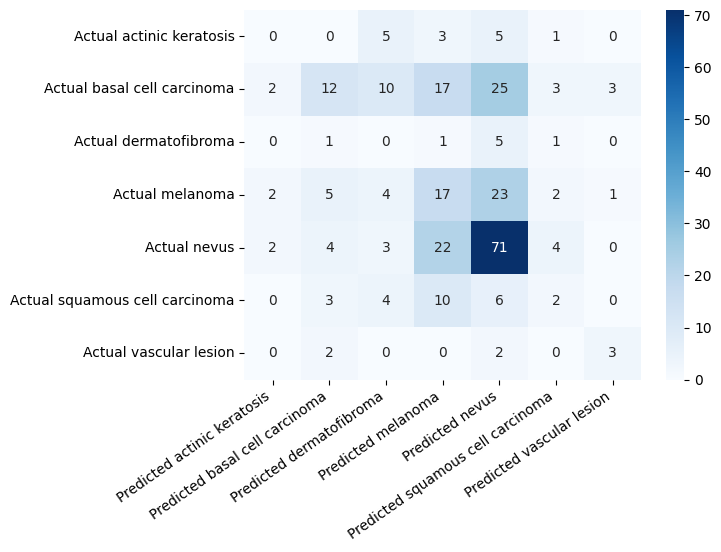

In [ ]:
print(f'Test Accuracy of {good_model_path}: {test_acc*100}')
heat_map, cm_matrix = plot_cm(labels, prediction, test_dataset)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels,  prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.44      0.17      0.24        72
           2       0.00      0.00      0.00         8
           3       0.24      0.31      0.27        54
           4       0.52      0.67      0.58       106
           5       0.15      0.08      0.11        25
           6       0.43      0.43      0.43         7

    accuracy                           0.37       286
   macro avg       0.26      0.24      0.23       286
weighted avg       0.37      0.37      0.35       286



In [ ]:
%%shell
jupyter nbconvert --to html "/content/CNN_model_Miranda (2).ipynb"

[NbConvertApp] Converting notebook /content/CNN_model_Miranda (2).ipynb to html
[NbConvertApp] Writing 1659186 bytes to /content/CNN_model_Miranda (2).html
